Author: Taufik Hidayat

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt            
%matplotlib inline     
sns.set(color_codes=True)

from jcopml.plot import plot_missing_value
from sklearn.preprocessing import LabelEncoder

# Load Dataset

In [2]:
df = pd.read_csv("loan_customer.csv")
df.head(5) 

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

In [4]:
df.shape

(621, 17)

In [5]:
df['phone_number'] = df['phone_number'].astype(str)

# Data Cleansing

## Handling missing values

In [6]:
print(df.isnull().sum())

loan_id                 0
birth_date             49
phone_number            0
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64


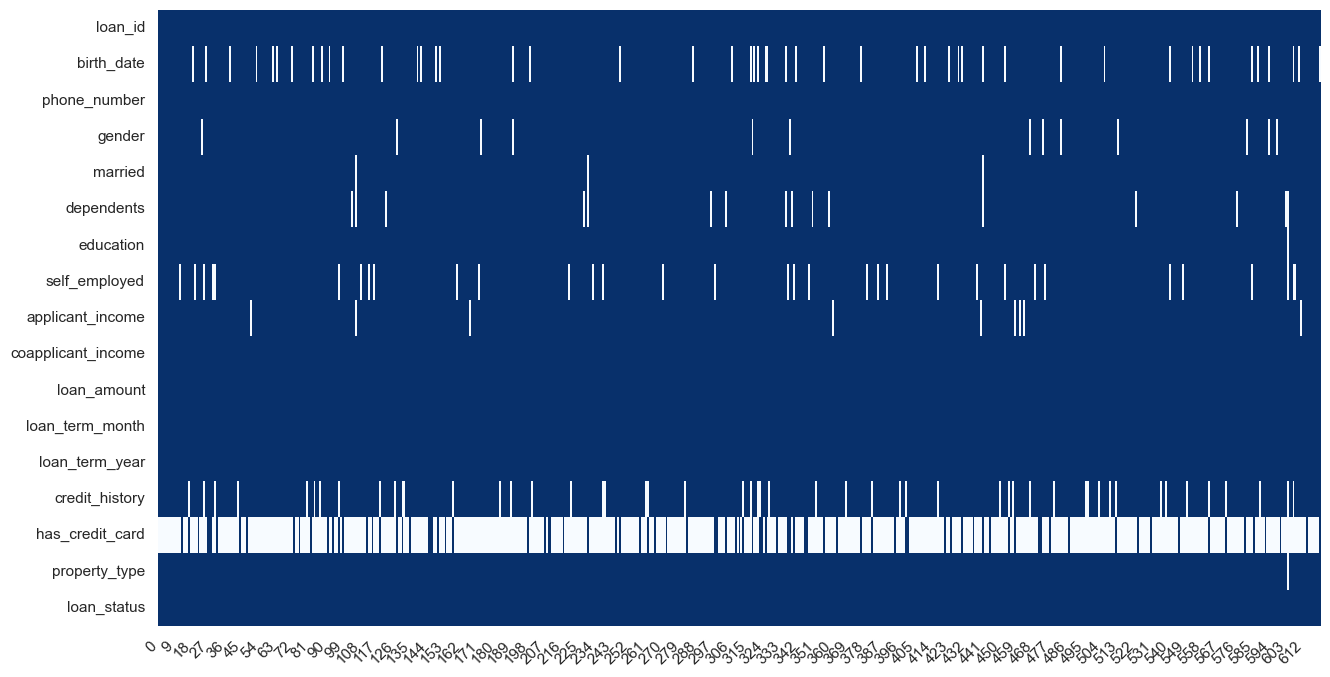

In [7]:
plot_missing_value(df)

In [8]:
df.drop(columns=['has_credit_card'], inplace=True)

In [9]:
cols_num = ['applicant_income', 'coapplicant_income', 'loan_amount', 
            'loan_term_month', 'loan_term_year', 'credit_history']
cols_cat = ['loan_id', 'birth_date', 'phone_number', 'gender',
            'married','dependents', 'education', 'self_employed', 'property_type', 'loan_status']

In [10]:
for col in cols_num:
    df[col].fillna(df[col].mean(), inplace=True)

In [11]:
for col in cols_cat:
    df[col].fillna(df[col].value_counts().index[0], inplace=True)

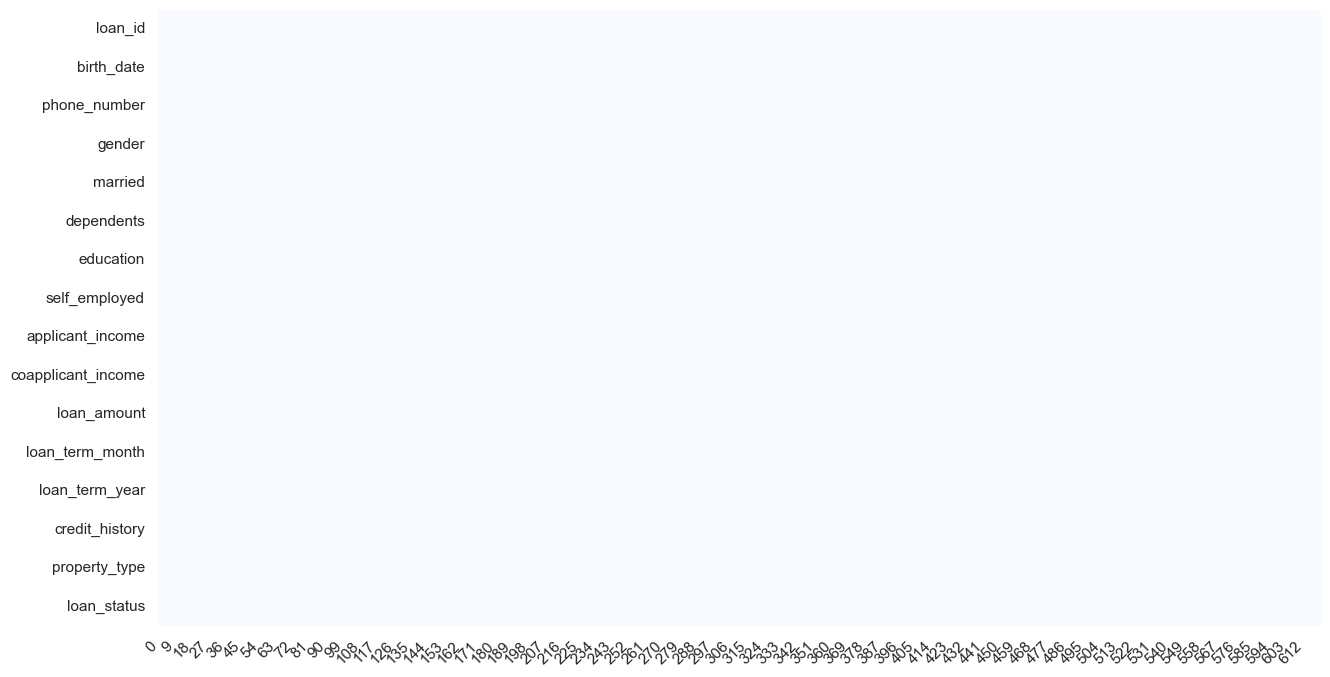

In [12]:
plot_missing_value(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          621 non-null    object 
 2   phone_number        621 non-null    object 
 3   gender              621 non-null    object 
 4   married             621 non-null    object 
 5   dependents          621 non-null    object 
 6   education           621 non-null    object 
 7   self_employed       621 non-null    object 
 8   applicant_income    621 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      621 non-null    float64
 14  property_type       621 non-null    object 
 15  loan_status         621 non-null    object 
dtypes: float

## Handling duplicated data

In [14]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5, 16)


In [15]:
df = df.drop_duplicates()

In [16]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 16)


## Handling Outlier

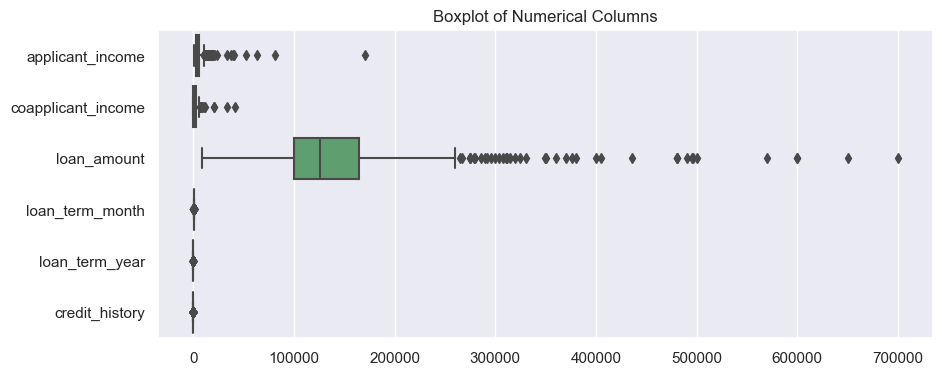

In [17]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df[cols_num], orient='h')
plt.title('Boxplot of Numerical Columns')
plt.show()

In [18]:
for col in cols_num:
    # Hitung Q1 dan Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

# Hitung IQR
    IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

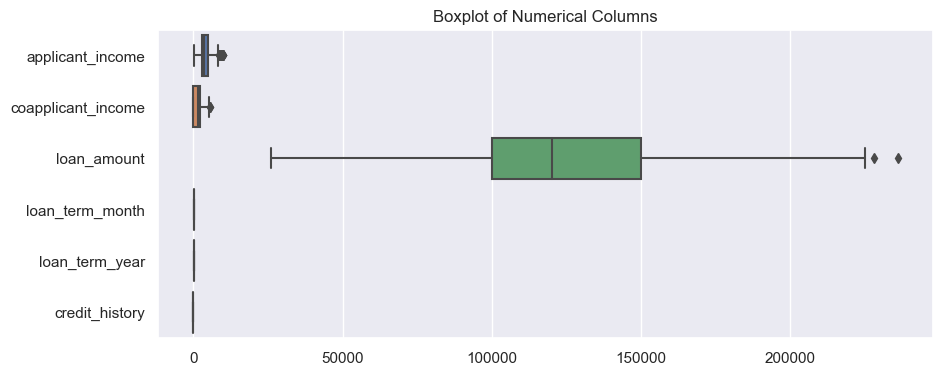

In [19]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df[cols_num], orient='h')
plt.title('Boxplot of Numerical Columns')
plt.show()

## Feature Encoding

In [20]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,628776449212.0,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,628119240537.0,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,62856343702.0,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,628113008687.0,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE


In [21]:
cols_cat = ['gender', 'married', 'education', 'self_employed', 'property_type', 'loan_status']

In [22]:
label_encoder = LabelEncoder()
for col in cols_cat:
    df[col] = label_encoder.fit_transform(df[col])

In [23]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,1,0,0,0,0,5849.0,0.0,100000,360,30,1.0,1,0
1,LP001003,1979-08-24,628776449212.0,1,1,1,0,0,4583.0,1508.0,128000,360,30,1.0,2,1
2,LP001005,1991-03-28,628119240537.0,1,1,0,0,1,3000.0,0.0,66000,360,30,1.0,1,0
3,LP001006,1980-06-02,62856343702.0,1,1,0,1,0,2583.0,2358.0,120000,360,30,1.0,1,0
4,LP001008,1989-05-19,628113008687.0,1,0,0,0,0,6000.0,0.0,141000,360,30,1.0,1,0


LabelEncoder:
1. gender: Male=1, Female=0
2. married: Yes=1, No=0
3. education: Not Graduate=1, Graduate=0
4. property_type: apartment=0, house=1, studio=2
5. loan_status: APPROVE=0, REJECT=1

# Business Insight

## Section 2: Analisis minat pelanggan berdasarkan pada tipe properti

### 2.1. Membuat tabel yang menunjukkan perbandingan jumlah pengajuan pinjaman oleh nasabah perempuan dan laki-laki untuk masing-masing tipe properti.

In [24]:
df1 = df.groupby(['gender', 'property_type'])['loan_id'].count().reset_index()
df1.columns = ['gender', 'property_type', 'count']
df1

,gender,property_type,count
0,0,0,32
1,0,1,15
2,0,2,17
3,1,0,104
4,1,1,87
5,1,2,92


### 2.2. Membuat visualisasi perbandingan jumlah pengajuan pinjaman oleh nasabah perempuan dan laki-laki untuk masing-masing tipe properti.

Text(0, 0.5, 'Jumlah Nasabah')

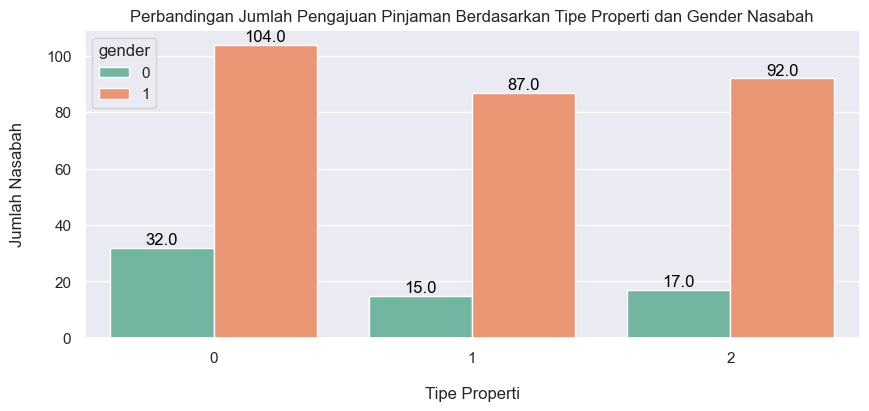

In [25]:
sns.set(style='darkgrid')
f, ax = plt.subplots(1, 1, figsize=(10,4))
sns.countplot(x='property_type', data = df, hue='gender', palette='Set2')

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width()/2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va = 'bottom', color='black', size=12)

ax.set_xlabel('Tipe Properti', labelpad=15)
plt.title("Perbandingan Jumlah Pengajuan Pinjaman Berdasarkan Tipe Properti dan Gender Nasabah")
ax.set_ylabel('Jumlah Nasabah', labelpad=15)
#plt.tight_layout()

1. gender: Male=1, Female=0
4. property_type: apartment=0, house=1, studio=2

### 2.3. Interpretasi

1. Apartemen adalah tipe properti yang paling banyak diminati oleh masing-masing gender.
2. Untuk setiap tipe properti, nasabah laki-laki memiliki minat lebih besar dibanding nasabah perempuan.

## Section 3: Analisis pengaruh status perkawinan terhadap jangka waktu meminjam

### 3.1. Membuat tabel yang menunjukkan banyaknya nasabah yang sudah dikelompokkan berdasarkan status perkawinan untuk setiap jangka waktu meminjam (dalam tahun)

In [26]:
df2 = df.groupby(['married', 'loan_term_year'])['loan_id'].count().reset_index()
df2.columns = ['married', 'loan_term_year', 'number_of_applicant']
df2

,married,loan_term_year,number_of_applicant
0,0,30,128
1,1,30,219


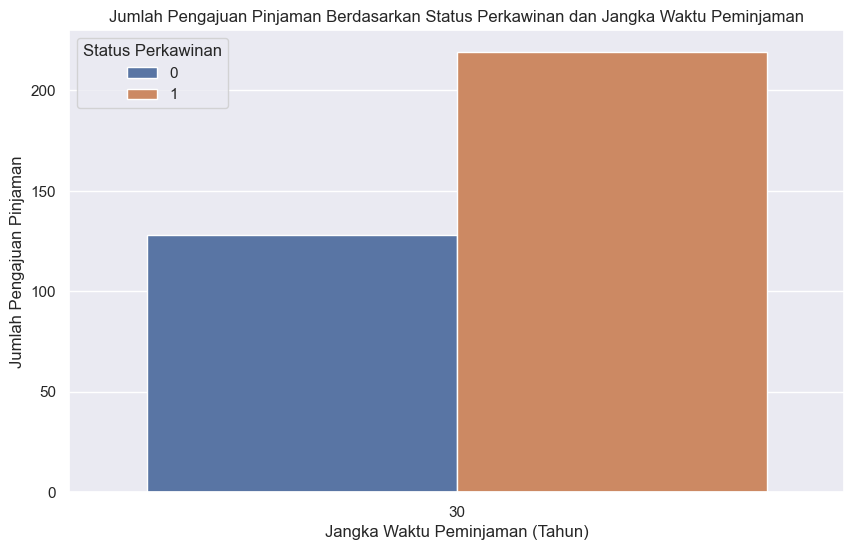

In [27]:
# Bar plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x='loan_term_year', y='number_of_applicant', hue='married')
plt.title('Jumlah Pengajuan Pinjaman Berdasarkan Status Perkawinan dan Jangka Waktu Peminjaman')
plt.xlabel('Jangka Waktu Peminjaman (Tahun)')
plt.ylabel('Jumlah Pengajuan Pinjaman')
plt.legend(title='Status Perkawinan')
plt.show()

### 3.2. Membuat visualisasi banyaknya nasabah yang sudah dikelompokkan berdasarkan status perkawinan untuk setiap jangka waktu meminjam (dalam tahun)

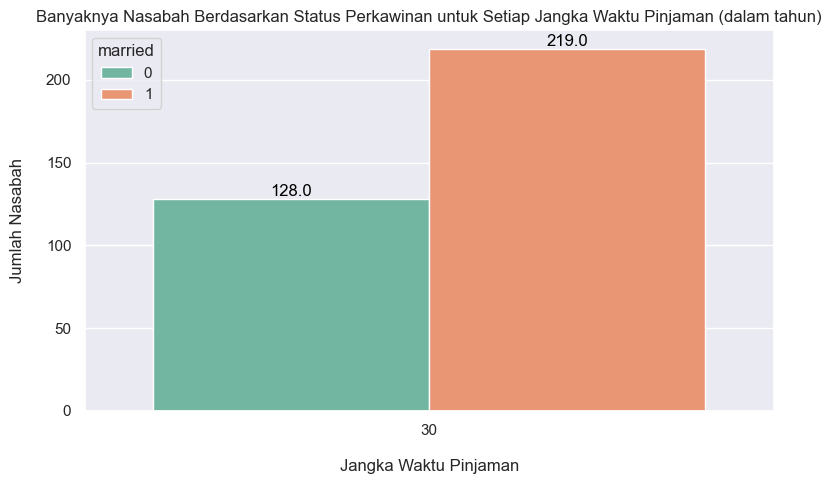

In [28]:
sns.set(style='darkgrid')
f, ax = plt.subplots(1, 1, figsize=(8,5))
sns.countplot(x='loan_term_year', data = df, hue='married', palette='Set2')

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width()/2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va = 'bottom', color='black', size=12)

ax.set_xlabel('Jangka Waktu Pinjaman', labelpad=15)
plt.title("Banyaknya Nasabah Berdasarkan Status Perkawinan untuk Setiap Jangka Waktu Pinjaman (dalam tahun)")
ax.set_ylabel('Jumlah Nasabah', labelpad=15)
plt.tight_layout()

 married: Yes=1, No=0

### 3.3. Interpretasi

Jumlah pengajuan pinjaman dari nasabah yang sudah menikah lebih tinggi dibandingkan dengan nasabah yang belum menikah.